# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. <br>
## Цель: Научиться определять рыночную стоимость объектов недвижимости. 
## Задача:  Установить ценообразующие параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

## 1. Изучение данных из файла

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
data = pd.read_csv('real_estate_data.csv', sep='	')

In [66]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [69]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [70]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод по этапу

Обзор данных позволил выявить следующее:
+ Проблемы с присвоенными типами данных для некоторых категорий(is_apartment - object)
+ Большое количество пропусков в is_apartment
+ Существуют варианты с большим количеством комнат
+ Существуют варианты с потолками в 100 метров
+ Существуют варианты с площадью в 900 метров
+ Обнаружены критические пропуски в ceiling_height, living_area, kitchen_area, ponds_around3000 и parks_around3000.

# Предобработка данных

1. Определить и изучить пропущенные значения
2. Привести данные к нужным типам

In [71]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data[data['days_exposition'].isna()].sort_values(by='first_day_exposition').head()
#Не считаю нужным убирать пропуски в days_exposition в исходном дампе, посколько это исказит полную картину мира

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3873,7,20100000.0,117.6,2014-11-27,3,NaN,8.0,62.5,7,NaN,...,21.5,NaN,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN
15857,6,25000000.0,145.2,2014-11-27,3,NaN,5.0,60.7,5,NaN,...,40.2,NaN,Санкт-Петербург,36779.0,14931.0,0.0,NaN,0.0,NaN,NaN
3291,8,8200000.0,52.5,2014-11-27,1,NaN,8.0,21.5,2,NaN,...,15.1,NaN,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN
6922,17,29999000.0,133.5,2014-12-08,3,3.0,15.0,71.7,12,NaN,...,19.8,2.0,Санкт-Петербург,31656.0,8733.0,1.0,562.0,1.0,522.0,NaN
15614,3,19400000.0,117.7,2014-12-09,3,3.0,8.0,62.6,5,False,...,21.3,NaN,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN


In [72]:
data = data.dropna(subset=['floors_total']) 
data['floors_total'] = data['floors_total'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
print(data['ponds_around3000'].unique())
print(data['parks_around3000'].unique())
data.head()
# Пожертвовал 86 записями с пропусками в floors_total, чтобы изменить тип на int, потому что не бывает пол этажа, 
# также изменил тип в количестве парков и водоемов

[2 0 3 1]
[1 0 2 3]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


In [73]:
data = data.dropna(subset=['locality_name']) 
data['locality_name'] = data['locality_name'].str.replace('городской поселок ','')
data['locality_name'] = data['locality_name'].str.replace('городской посёлок ','')
data['locality_name'] = data['locality_name'].str.replace('деревня ','')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа ','')
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа ','')
data['locality_name'] = data['locality_name'].str.replace('посёлок при железнодорожной станции ','')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции ','')
data['locality_name'] = data['locality_name'].str.replace('поселок ','')
data['locality_name'] = data['locality_name'].str.replace('посёлок ','')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ','')
data['locality_name'] = data['locality_name'].str.replace('село ','')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество ','')
# data['locality_name'].unique()
#Убрал неявные дубликаты в названиях населенных пунктов

Провожу оценку аномальных значений показателей

In [74]:
data[data['total_area']==900]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0


In [75]:
data[data['rooms']==19]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,32250000.0,374.6,2018-06-09,19,NaN,5,264.5,2,NaN,...,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0,NaN,2,548.0,114.0


In [76]:
data.loc[data['ceiling_height']==100,'ceiling_height']=data['ceiling_height'].median()
#Избавился от аномально высоких значений, не тронул запись с 900 кв. м и 19 комнатами, 
#потому что такие объекты похожи на правду по остальным характеристикам

In [77]:
data[data['last_price']==data['last_price'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30,7,NaN,10,250.0,10,NaN,...,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1,530.0,3,756.0,33.0


Считаю, что пропуски в parks_nearest и ponds_nearest стоит не учитывать только в процессе иследования срезов

In [79]:
temp = data[~(data['living_area'].isna()) & ~(data['kitchen_area'].isna())]
temp['living_area_percent'] = temp['living_area'] / temp['total_area'] 
temp['kitchen_area_percent'] = temp['kitchen_area'] / temp['total_area'] 
display(temp['living_area_percent'].mean())
display(temp['kitchen_area_percent'].mean())
data['living_area'] = data['living_area'].fillna(data['total_area']*temp['living_area_percent'].mean())
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']*temp['kitchen_area_percent'].mean())
#Столкнулся с проблемой что нельзя заменять все пропуски на медианы или средние, иначе в некоторых случаях
# жилая площадь будет больше чем общая, поэтому заменил на произведение общей площади и средней доли площади жилой
# и кухни соответтсвенно

0.5647555807192263

0.18730303787107647

In [80]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
# Замена пропусков в высоте потолков

## Расчёты и добавление результатов в таблицу

Шаг 3. Посчитайте и добавьте в таблицу
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [81]:
data['square_price'] = data['last_price']/data['total_area']
data['year'] = data['first_day_exposition'].dt.year
data['month'] = data['first_day_exposition'].dt.month
data['day'] = data['first_day_exposition'].dt.weekday
def fl(row):
    if row['floor'] == 1:
        cat = 'Первый'
    elif row['floor'] == row['floors_total']:
        cat = 'Последний'
    else:
        cat = 'Другой'
    return cat
data['floor_cat'] = data.apply(fl, axis=1)
data['liv_tot_prop'] = data['living_area']/data['total_area']
data['kit_tot_prop'] = data['kitchen_area']/data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_price,year,month,day,floor_cat,liv_tot_prop,kit_tot_prop
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,NaN,...,2,755.0,NaN,120370.370370,2019,3,3,Другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,NaN,...,0,NaN,81.0,82920.792079,2018,12,1,Первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,NaN,...,2,574.0,558.0,92785.714286,2015,8,3,Другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,89.460183,9,NaN,...,3,234.0,424.0,408176.100629,2015,7,4,Другой,0.562643,0.186952
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,NaN,...,1,48.0,121.0,100000.000000,2018,6,1,Другой,0.320000,0.410000


## Вывод по разделу
Произведена предобработка данных, убраны аномальные значения и пропуски, некоторые показатели к виду необходимому для обработки. Пропуски оставлены там, где они не исказят общую картину о данных

## Исследовательский анализ данных

#### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

In [82]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,year,month,day,liv_tot_prop,kit_tot_prop
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,12090.000000,...,8030.000000,23565.000000,9036.000000,20394.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.720399,10.675875,34.549495,5.878124,10.563311,1.157155,...,490.580448,0.589900,518.289509,180.741395,9.940584e+04,2017.371016,6.401570,2.567367,0.564756,0.187303
std,5.681156,1.091093e+07,35.657060,1.078591,0.761938,6.594823,22.336060,4.871485,6.091290,1.070877,...,341.572956,0.883966,278.009558,219.732782,5.038943e+04,1.037393,3.492948,1.788279,0.101058,0.069453
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118349e+02,2014.000000,1.000000,0.000000,0.021583,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,...,288.000000,0.000000,293.000000,45.000000,7.656613e+04,2017.000000,3.000000,1.000000,0.500000,0.136738
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,1.000000,...,455.000000,0.000000,503.000000,95.000000,9.500000e+04,2017.000000,6.000000,3.000000,0.562643,0.182000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,2.000000,...,612.000000,1.000000,730.000000,231.000000,1.142132e+05,2018.000000,10.000000,4.000000,0.631732,0.223881
max,50.000000,7.630000e+08,900.000000,19.000000,32.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,2019.000000,12.000000,6.000000,1.000000,0.787879


array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

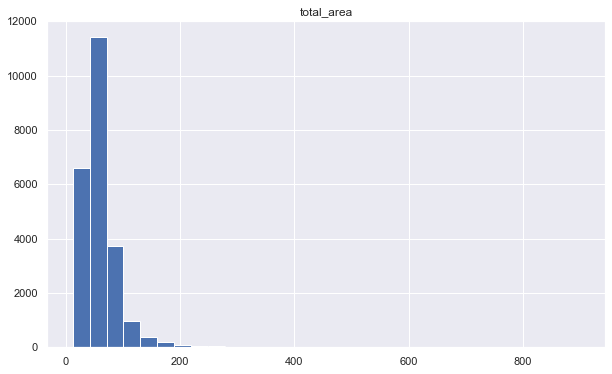

In [83]:
sns.set(rc = {'figure.figsize':(10,6)})
data.hist('total_area', bins=30)

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

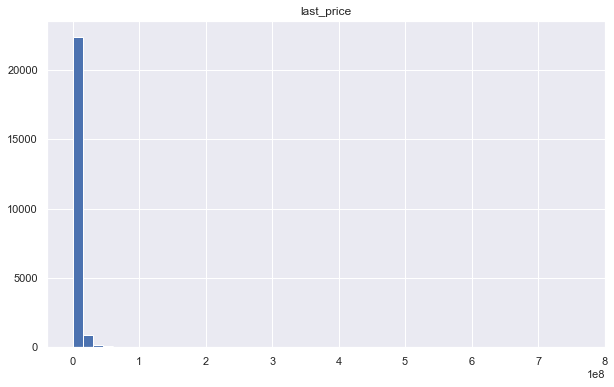

In [84]:
data.hist('last_price', bins=50)

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

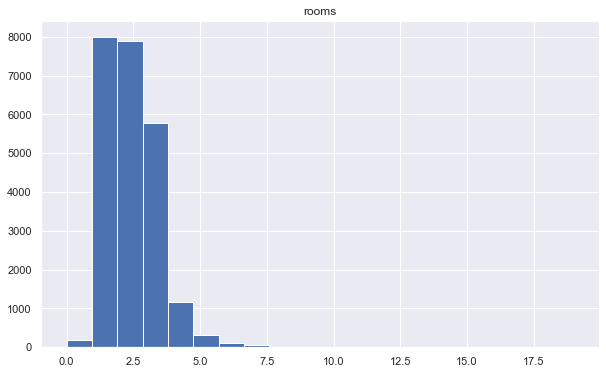

In [85]:
data.hist('rooms', bins=20)

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

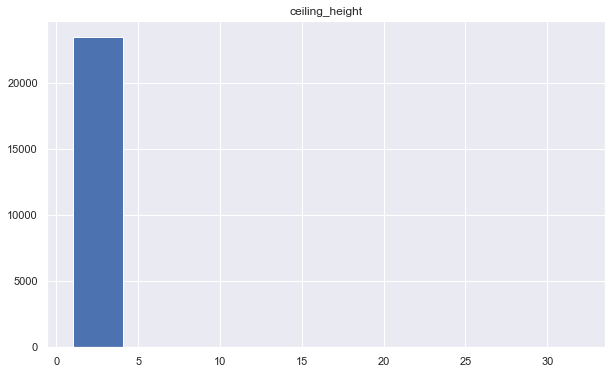

In [86]:
data.hist('ceiling_height', bins=10)

При помощи метода describe и построении гистограм без дополнительных аргументов, можно заметить большее количество аномальных значений, в следующих блоках приведу эти показатели к значениям, отражающим реальную картину мира

####  «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»

In [87]:
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [88]:
print('Медиана', data['days_exposition'].median())
print('Среднее',round(data['days_exposition'].mean(),2))

Медиана 95.0
Среднее 180.74


In [89]:
data.loc[data['days_exposition']>600, 'days_exposition'].count()

1193

In [90]:
data.loc[data['days_exposition']<=4, 'days_exposition'].count()

335

<AxesSubplot:>

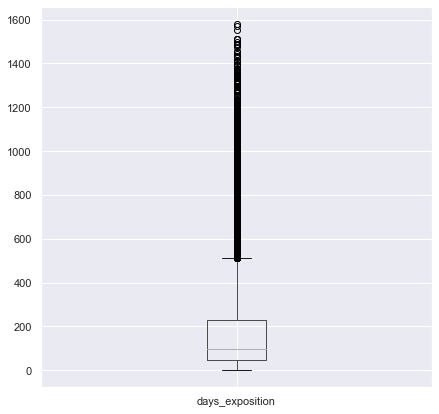

In [91]:
data.boxplot(column=['days_exposition'], figsize=(7,7))

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

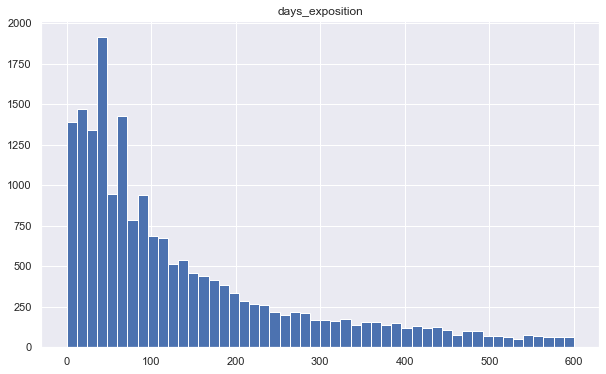

In [92]:
# Возьму в график значения от 0 до 600 потому что они входят в межквартильный размах
data.hist('days_exposition', bins=50, range=(0, 600))
# Всплеск продаж приходится на 43 и 61 день

##### Большая часть квартир продается до 200 дней. В категорию долгих продаж можно выделить все что больше 600 дней. Таких записей 1193, которые выходят за межквартильный размах. Подозрительно быстро продаются квартиры в течение первых 4 дней. Таких записей 335

#### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

In [93]:
good_data = data[data['total_area']<350]
good_data = good_data[good_data['last_price']<9900000]
good_data = good_data[good_data['rooms']<10]
good_data = good_data[good_data['ceiling_height']<8]
good_data = good_data[good_data['days_exposition']<1480]
good_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,year,month,day,liv_tot_prop,kit_tot_prop
count,18213.000000,1.821300e+04,18213.000000,18213.000000,18213.000000,18213.000000,18213.000000,18213.000000,18213.000000,9883.000000,...,5528.000000,18213.000000,6415.000000,18213.000000,18213.000000,18213.000000,18213.000000,18213.000000,18213.000000,18213.000000
mean,9.443420,4.562599e+06,51.430017,1.867787,2.664506,10.921979,29.337376,5.952342,9.357842,1.078215,...,485.384226,0.512601,534.694154,169.958326,90345.743324,2017.248394,6.578927,2.588042,0.562231,0.191252
std,5.494886,1.877222e+06,17.420940,0.883060,0.169242,6.671491,12.370778,4.938345,3.569548,1.008492,...,325.348028,0.812216,276.805873,206.735168,27912.733061,0.947567,3.489542,1.787775,0.100190,0.067250
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,...,1.000000,0.000000,16.000000,1.000000,111.834862,2014.000000,1.000000,0.000000,0.038462,0.043524
25%,6.000000,3.280000e+06,38.000000,1.000000,2.600000,5.000000,18.000000,2.000000,7.000000,0.000000,...,287.000000,0.000000,321.000000,43.000000,73972.602740,2017.000000,3.000000,1.000000,0.500000,0.142518
50%,9.000000,4.250000e+06,47.200000,2.000000,2.650000,9.000000,28.132133,4.000000,8.800000,1.000000,...,451.000000,0.000000,523.000000,90.000000,91176.470588,2017.000000,7.000000,3.000000,0.562643,0.186952
75%,13.000000,5.650000e+06,61.200000,2.000000,2.650000,16.000000,37.000000,8.000000,11.000000,2.000000,...,611.250000,1.000000,741.000000,216.000000,106666.666667,2018.000000,10.000000,4.000000,0.628352,0.229730
max,39.000000,9.890000e+06,201.500000,7.000000,5.800000,60.000000,113.372497,31.000000,64.000000,5.000000,...,3190.000000,3.000000,1344.000000,1477.000000,312240.000000,2019.000000,12.000000,6.000000,1.000000,0.787879


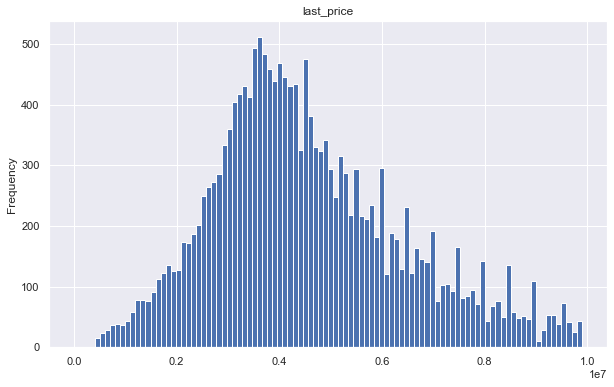

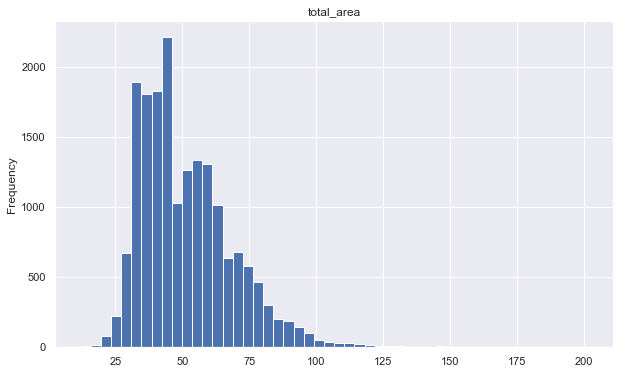

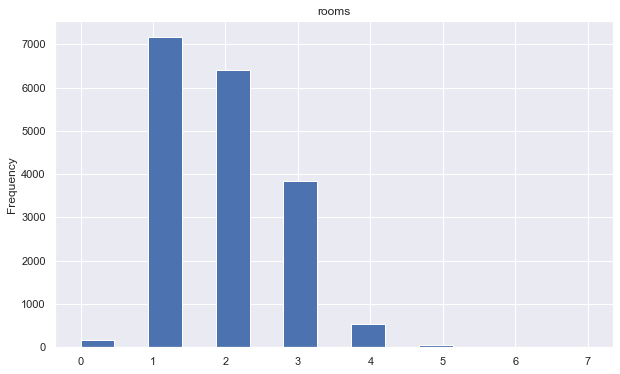

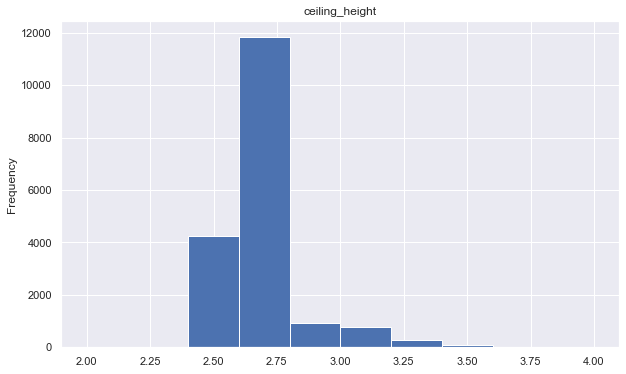

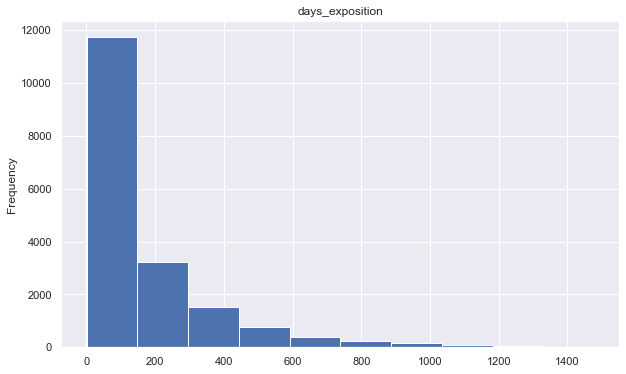

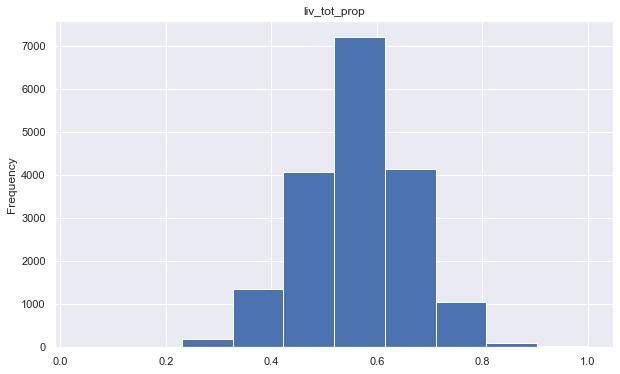

In [94]:
good_data['last_price'].plot( kind='hist', title='last_price', bins=100)
plt.show()
good_data['total_area'].plot( kind='hist', title='total_area', bins=50)
plt.show()
good_data['rooms'].plot( kind='hist', title='rooms', bins=15)
plt.show()
good_data['ceiling_height'].plot( kind='hist', title='ceiling_height',  range=(2,4))
plt.show()
good_data['days_exposition'].plot( kind='hist', title='days_exposition')
plt.show()
good_data['liv_tot_prop'].plot( kind='hist', title='liv_tot_prop')
plt.show()

После удаления аномальных значений, гистограммы начали принимать распределение, похожее на Пуассоновское. Больше всего продается однокомнатных квартир с площадью до 50кв. метров. Большинство квартир продаются в течение 200 дней. 

#### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года

In [95]:
data_cor = good_data[['last_price','total_area','rooms','year','month','day', 'floor_cat', 'cityCenters_nearest', 'days_exposition', 'ceiling_height']]
data_cor.corr()


,last_price,total_area,rooms,year,month,day,cityCenters_nearest,days_exposition,ceiling_height
last_price,1.000000,0.663898,0.433542,-0.015306,0.008093,-0.011212,-0.333741,0.056052,0.313266
total_area,0.663898,1.000000,0.805643,-0.086874,0.001750,-0.007718,-0.088544,0.103487,0.231107
rooms,0.433542,0.805643,1.000000,-0.064365,-0.003100,-0.004765,-0.054455,0.076967,0.058652
year,-0.015306,-0.086874,-0.064365,1.000000,-0.197977,0.005500,0.010957,-0.597680,-0.045967
month,0.008093,0.001750,-0.003100,-0.197977,1.000000,0.008112,-0.014983,-0.041104,-0.002921
day,-0.011212,-0.007718,-0.004765,0.005500,0.008112,1.000000,0.006775,-0.018138,-0.003668
cityCenters_nearest,-0.333741,-0.088544,-0.054455,0.010957,-0.014983,0.006775,1.000000,-0.009552,-0.219877
days_exposition,0.056052,0.103487,0.076967,-0.597680,-0.041104,-0.018138,-0.009552,1.000000,0.046296
ceiling_height,0.313266,0.231107,0.058652,-0.045967,-0.002921,-0.003668,-0.219877,0.046296,1.000000


In [96]:
mstat = good_data.pivot_table(index='month', values='last_price', aggfunc=['count', 'mean'])
mstat.columns = ['count', 'mean_price']
mstat = mstat.sort_values(by='count', ascending=False)
display(mstat)

,count,mean_price
month,,
2,2040,4.559245e+06
11,1909,4.609399e+06
3,1776,4.521193e+06
10,1739,4.578627e+06
9,1601,4.605155e+06
6,1493,4.448696e+06
8,1439,4.572906e+06
7,1401,4.559305e+06
4,1349,4.632887e+06


Из представленной группировки видно, что чаще объявления размещаются в февраля, а реже в мае, однако средняя цена по всем месяцам варьируется в одном диапазоне.

In [97]:
floor_dep = data_cor.pivot_table(index='floor_cat', values='last_price', columns='rooms', aggfunc='mean')
display(floor_dep)

rooms,0,1,2,3,4,5,6,7
floor_cat,,,,,,,,
Другой,2.899760e+06,3.836287e+06,5.113806e+06,5.814464e+06,6.393573e+06,7.230938e+06,8.188000e+06,NaN
Первый,2.557556e+06,3.067997e+06,3.773341e+06,4.940148e+06,5.746600e+06,6.835294e+06,NaN,NaN
Последний,3.263440e+06,3.358883e+06,4.171238e+06,5.279768e+06,6.059024e+06,8.083545e+06,7.496667e+06,7900000.0


На стоимость квартиры больше всего влияет, общая площадь, количество комнат и расстояние до центра. Чаще всего стоимость квартиры на первом этаже ниже чем на других этажах. Чаще объявления размещаются в февраля, а реже в мае, однако средняя цена по всем месяцам варьируется в одном диапазоне.

#### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`

In [98]:
local = good_data.pivot_table(index='locality_name', values='square_price', aggfunc=['count', 'mean'])
#local = local.rename(columns = {'count':'new_count2'})
local.columns = ['count', 'mean_square_price']
#display(local)             
local = local.sort_values(by='count', ascending=False).head(10)
display(local)

,count,mean_square_price
locality_name,,
Санкт-Петербург,11486,103073.910862
Мурино,545,85665.075610
Кудрово,434,94056.435168
Шушары,405,77842.063588
Всеволожск,336,66474.874703
Колпино,306,74599.167217
Парголово,302,89505.043917
Пушкин,279,99220.442326
Гатчина,266,67855.275639


#### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона

(0.0, 25.0)

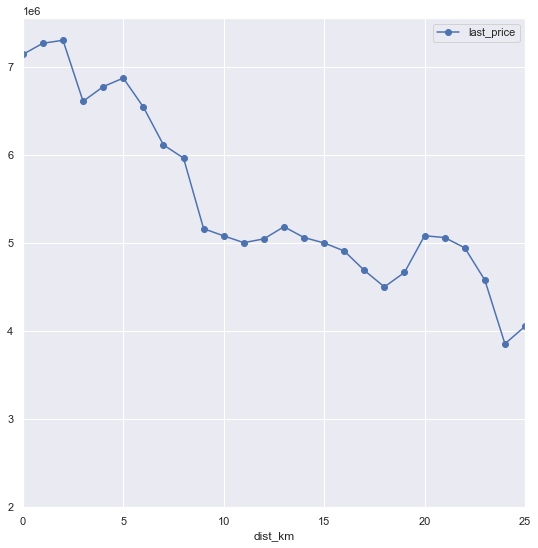

In [99]:
spb_m = good_data.query('locality_name=="Санкт-Петербург"')
spb_m = spb_m.dropna(subset=['cityCenters_nearest'])                                                          
spb_m['dist_km'] = round(spb_m['cityCenters_nearest']/1000)
spb_m.pivot_table(index='dist_km', values='last_price', aggfunc='mean').plot(style='o-', grid=True, figsize=(9,9))
plt.xlim([0, 25])


В район центра входит область радиусом 8 км от центра города.

#### Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»

In [100]:
spb_center = spb_m.query('dist_km<=8')
spb_center[['last_price','total_area','rooms','year','month','day', 'floor_cat', 'cityCenters_nearest','days_exposition', 'ceiling_height']].corr()

,last_price,total_area,rooms,year,month,day,cityCenters_nearest,days_exposition,ceiling_height
last_price,1.000000,0.676716,0.462688,-0.045106,-0.016478,0.026621,-0.204566,0.150667,0.218695
total_area,0.676716,1.000000,0.798366,-0.120465,0.014795,0.017413,-0.241886,0.132117,0.254382
rooms,0.462688,0.798366,1.000000,-0.065986,0.010493,-0.009896,-0.208304,0.074126,0.186030
year,-0.045106,-0.120465,-0.065986,1.000000,-0.170388,0.026543,0.081693,-0.635384,0.026500
month,-0.016478,0.014795,0.010493,-0.170388,1.000000,0.033497,-0.028845,-0.064085,0.022235
day,0.026621,0.017413,-0.009896,0.026543,0.033497,1.000000,0.010154,-0.032523,-0.027406
cityCenters_nearest,-0.204566,-0.241886,-0.208304,0.081693,-0.028845,0.010154,1.000000,-0.082501,-0.253348
days_exposition,0.150667,0.132117,0.074126,-0.635384,-0.064085,-0.032523,-0.082501,1.000000,0.038332
ceiling_height,0.218695,0.254382,0.186030,0.026500,0.022235,-0.027406,-0.253348,0.038332,1.000000


In [101]:
spbstat = spb_center.pivot_table(index='month', values='last_price', aggfunc=['count', 'mean'])
spbstat.columns = ['count', 'mean_price']
spbstat = spbstat.sort_values(by='count', ascending=False)
display(spbstat)
spbstat = spbstat.sort_values(by='mean_price', ascending=False)
display(spbstat)

,count,mean_price
month,,
2,217,6.658062e+06
11,204,6.686315e+06
3,197,6.635198e+06
10,189,6.601261e+06
9,186,6.662881e+06
6,180,6.464421e+06
7,177,6.704032e+06
8,161,6.411859e+06
12,160,6.310188e+06


,count,mean_price
month,,
7,177,6.704032e+06
11,204,6.686315e+06
9,186,6.662881e+06
2,217,6.658062e+06
5,128,6.650880e+06
3,197,6.635198e+06
10,189,6.601261e+06
1,118,6.584278e+06
4,159,6.510505e+06


Зависимости по основным показателям такие же как и в других городах, но в районе центра снижена зависимость цены от удаления от центра и высоты потолков. Объявления также чаще всего размещаются в феврале, а вот реже в январе, средняя цена выше в июле, а в декабре ниже.

## Вывод по разделу:
 На стоимость квартиры больше всего влияет, общая площадь, количество комнат и расстояние до центра. Чаще всего стоимость квартиры на первом этаже ниже чем на других этажах. Объявления также чаще всего размещаются в феврале. В центре Санкт Петербурга корреляция слегка меняется: так снижается зависимость цены от расстояния до центра(удивительно, да?) и высоты потолков. Однако возрастает зависимость цены от количества дней нахождения квартиры в продаже. Она небольшая и вероятно связана с тем, что люди неохотно верят свежим объявлениям из за угрозы мошенников. Средняя цена по Спб выше в июле, а в декабре ниже.

## Общий вывод

В результате проведенного анализа данных рынка недвижимости выявлено:
1. Большая часть квартир продается до 200 дней. Также всплеск продаж приходится на 43 и 61 день
2. На стоимость квартиры больше всего влияет, общая площадь, количество комнат и расстояние до центра. Чаще всего стоимость квартиры на первом этаже ниже чем на других этажах. размещение в конкретный день, месяц или год никак не влияет на стоимость квартиры.
3. Чаще всего квартиры продаются в Санкт-Петербурге. За представленный преиод было выставлено 11567	объявлений. Средняя стоимость квадратного метра составляет: 103211 рублей.
4. В центральный район Санкт-Петербурга входит зона радиусом в 8 км. Зависимость цены от исследуемых показателей в центре Санкт-Петербурга не сильно отличается от остальных районов и городов, однако расстояние до центра и высота потолков не так важна здесь при покупке квартиры. Месяц года оказывает определенное влияние на стоимость количество объявлений